In [1]:
!pip install yfinance pandas numpy matplotlib seaborn plotly scikit-learn statsmodels prophet --quiet


In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Download historical stock data for Apple (AAPL)
data = yf.download("AAPL", start="2020-01-01", end="2024-12-31")

# Show the first 5 rows
data.head()


/tmp/ipython-input-2-413076092.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("AAPL", start="2020-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.620850,72.681296,71.373226,71.627100,135480400
2020-01-03,71.914825,72.676454,71.689965,71.847125,146322800
2020-01-06,72.487869,72.526556,70.783271,71.034732,118387200
2020-01-07,72.146935,72.753816,71.926907,72.497522,108872000
2020-01-08,73.307510,73.609745,71.849533,71.849533,132079200


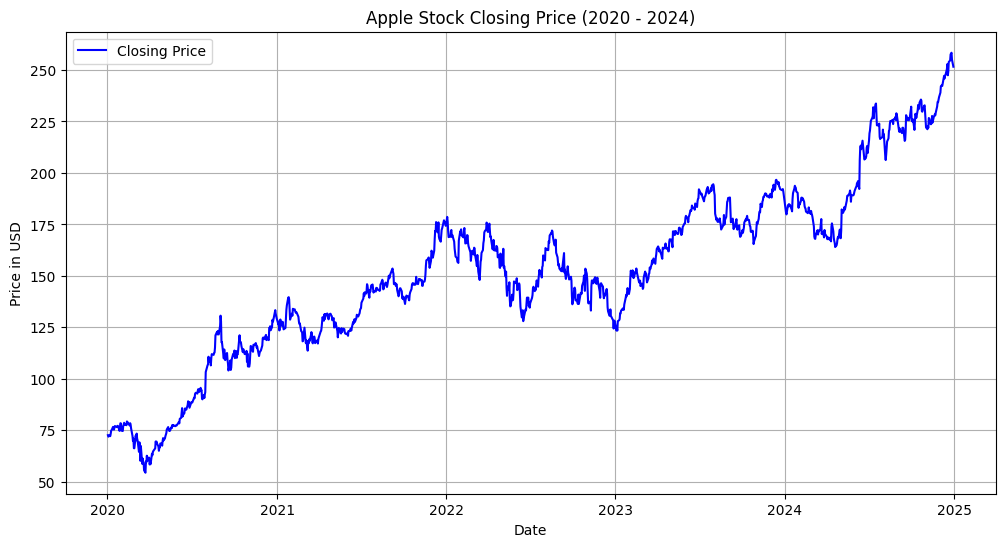

In [3]:
# Visualize the Closing Price of Apple stock
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(data['Close'], color='blue', label='Closing Price')
plt.title('Apple Stock Closing Price (2020 - 2024)')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.legend()
plt.grid(True)
plt.show()


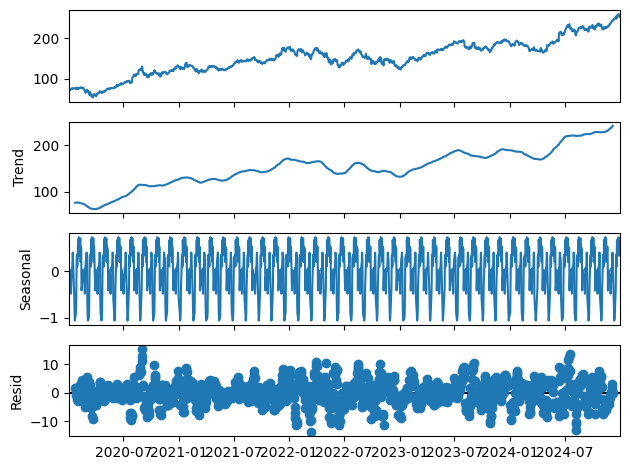

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series: only the 'Close' price is used
decomposition = seasonal_decompose(data['Close'], model='additive', period=30)

# Plot the decomposed components
decomposition.plot()
plt.tight_layout()
plt.show()


In [5]:
from prophet import Prophet

# Prepare data for Prophet
df = data.reset_index()[['Date', 'Close']]
df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

# Drop the multi-level index from the 'y' column
df.columns = df.columns.droplevel(0)

df.head()

Price,ds,y
Ticker,,AAPL
0,2020-01-02,72.620850
1,2020-01-03,71.914825
2,2020-01-06,72.487869
3,2020-01-07,72.146935
4,2020-01-08,73.307510


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc9vpdl8r/85by_37p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc9vpdl8r/oxmemwxr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45044', 'data', 'file=/tmp/tmpc9vpdl8r/85by_37p.json', 'init=/tmp/tmpc9vpdl8r/oxmemwxr.json', 'output', 'file=/tmp/tmpc9vpdl8r/prophet_modelxsrf_td9/prophet_model-20250711083128.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:31:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:31:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


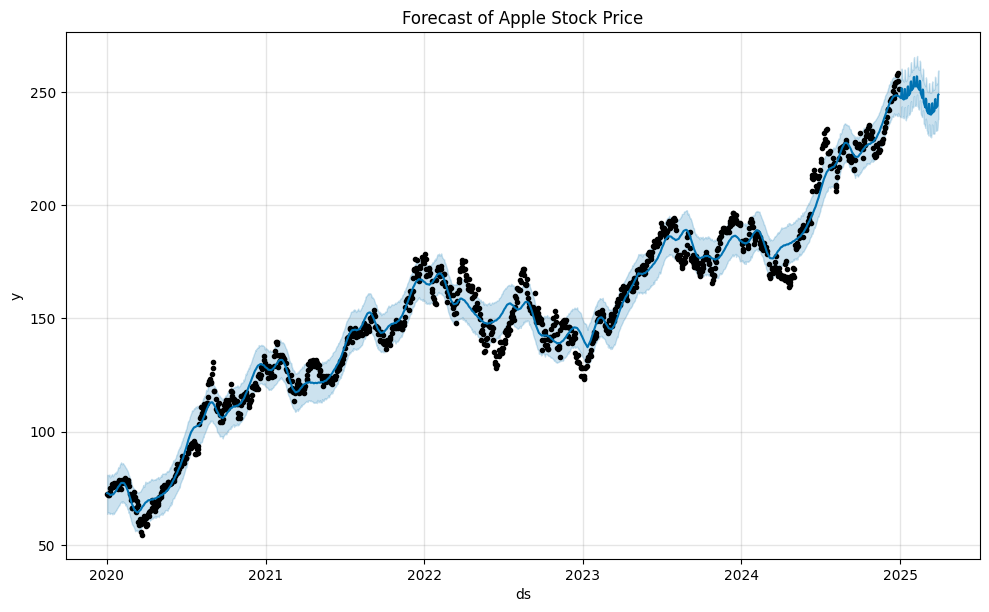

In [8]:
# Fit the model
from prophet import Prophet

model = Prophet()
model.fit(df)

# Create future dates and make prediction
future = model.make_future_dataframe(periods=90)
forecast = model.predict(future)

# Plot the forecast
model.plot(forecast)
plt.title("Forecast of Apple Stock Price")
plt.show()


In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Merge forecast and original data
df_forecast = forecast[['ds', 'yhat']].set_index('ds')
df_actual = df.set_index('ds')

# Align both datasets
merged = df_actual.join(df_forecast, how='inner')

# Calculate error metrics
mae = mean_absolute_error(merged['y'], merged['yhat'])
rmse = np.sqrt(mean_squared_error(merged['y'], merged['yhat']))

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Mean Absolute Error (MAE): 5.04
Root Mean Squared Error (RMSE): 6.54
